## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [1]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [2]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [3]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'
data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

In [4]:
import re
pattern = r'n\d{8}_\d+.'
new = re.sub(pattern,'',data[999])

In [5]:
new

'http://farm4.static.flickr.com/3188/3118039009_ecc0ef08d4.jpg'

In [6]:
clean_url = []
for url in data:
    pattern = r'n\d{8}_\d+.'
    new_url = re.sub(pattern,'',url)
    clean_url.append(new_url)

In [7]:
clean_url

['http://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
 'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
 'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
 'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
 'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg',
 'http://img172.imageshack.us/img172/4606/napo03072en9.jpg',
 'http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg',
 'http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg',
 'http://www.porschemania.it/discus/messages/815/102099.jpg',
 'http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg',
 'http://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg',
 'http://farm4.static.flickr.com/3217/2942611930_d68204f726.jpg',
 'http://farm1.static.flickr.com/29/54608382_ee8bd4f7fa.jpg',
 'http://www.dierentuin.nl/images/jongengiraffe.jpg',
 'http://farm4.static.flickr.com/3279/3118

## 將 txt 轉成 pandas dataframe

In [11]:
import pandas as pd
df = pd.DataFrame(clean_url)
df.head()

,0
0,http://farm1.static.flickr.com/145/430300483_2...
1,http://farm2.static.flickr.com/1005/3352960681...
2,http://farm1.static.flickr.com/27/51009336_a96...
3,http://farm4.static.flickr.com/3025/2444687979...
4,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [18]:
df.loc[0][0]

'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

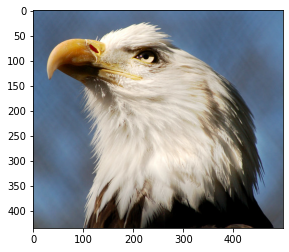

In [17]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0][0]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [23]:
df[0:5][0]

0    http://farm1.static.flickr.com/145/430300483_2...
1    http://farm2.static.flickr.com/1005/3352960681...
2    http://farm1.static.flickr.com/27/51009336_a96...
3    http://farm4.static.flickr.com/3025/2444687979...
4    http://img100.imageshack.us/img100/3253/forres...
Name: 0, dtype: object

In [57]:
response = requests.get(df[0:5][0][0])

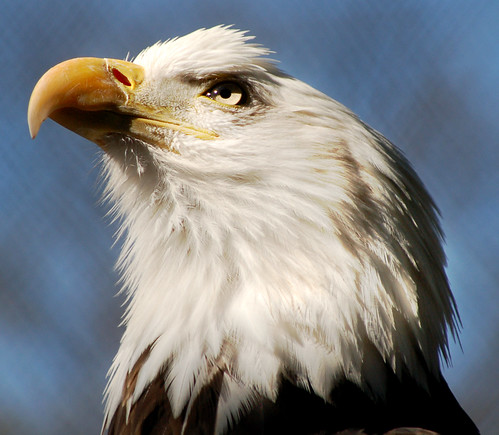

In [58]:
Image.open(BytesIO(response.content))

In [79]:

def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """

    img_list = []
    for i in url_list:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        img = np.array(img)
        
    return img

In [80]:
from PIL import Image
import io

In [81]:
result = df[0:5][0].values.tolist()

In [82]:
result = img2arr_fromURLs(df[0:5][0].values.tolist())
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

# for im_get in result:
#     plt.imshow(im_get)
#     plt.show()

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x11b6958f0>